In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Normalized Discounted Cumulative Gain (NDCG) 

In the following cell, we write a function to get Normalized Discounted Cumulative Gain Score position k

In [58]:
def get_ndcg(y_true, prediction, k, n):
    """Discounted cumulative gain (DCG) at rank k
    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).
        
    ranking : array-like, shape = [k]
    
    
    k : int
        Rank.
        
    n : total number of observations
    Returns
    -------
    DCG @k : float
    """
    y_true = np.asarray(y_true)
    ranking = np.asarray(prediction)
    length = len(prediction)
    
    dcg = 0
    idcg = 0
    rel = []
    for i in range(0,n):
        rel.append(n - np.absolute(prediction[i]-y_true[i]))
        
    
    max_rel = sorted(rel,reverse = True)
    
    for i in range(0,k):
        gains = 2 ** rel[i] - 1
        discounts = np.log2(i + 2)
        dcg += gains/discounts # get DCG
    '''
        gains_max = 2 ** max_rel[i] - 1
        idcg += gains_max/discounts # get IDCG
    '''
    for i in range(0,n):
        gains_max = 2 ** max_rel[i] - 1
        discounts = np.log2(i + 2)
        idcg += gains_max/discounts # get IDCG
        

    NDCG = dcg/idcg  
    
    return NDCG 

Setting parameters- y_true, prediction and rel

In [59]:
y_true = []
prediction = []
for i in range(1,21):
    y_true.append(i)
    
for i in  random.sample(range(1,21),20):
         prediction.append(i)

In [60]:
y_true

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [61]:
prediction

[20, 16, 18, 11, 19, 17, 4, 1, 2, 12, 15, 5, 13, 9, 7, 8, 3, 14, 6, 10]

Now we can get the NDCG ranking score at k th position, here we take 1 , 13 and 20 as illustration

In [67]:
get_ndcg(y_true, prediction, 1, 20)

7.3657575782591018e-07

In [68]:
get_ndcg(y_true, prediction, 13, 20)

0.31246166814220561

In [69]:
get_ndcg(y_true, prediction, 20, 20)

0.33169918077524441

# Plot for NDCG


In [70]:
ndcg= []
for i in range(1,21):
    ndcg.append(get_ndcg(y_true, prediction, i, 20))

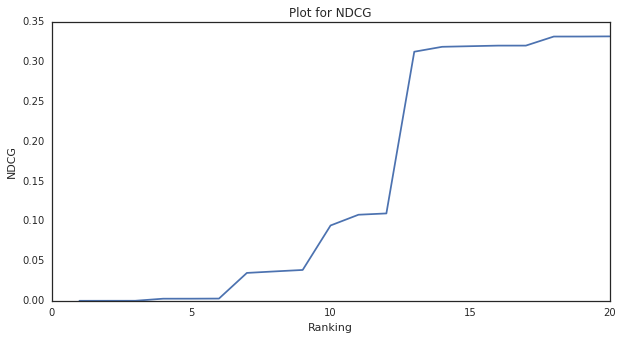

In [71]:
# Make plots
fig, ax = plt.subplots(figsize = (10, 5))
sns.set(style="white")

plt.plot(range(1,21),ndcg)
    
# Set title and labes
plt.title("Plot for NDCG")
plt.ylabel("NDCG")
plt.xlabel("Ranking")